Willkommen bei Google Colab! Hier könnt ihr auch auf GPUs trainieren (über Runtime einstellen).

In diesem Notebook generieren wir uns zunächst Daten mit dem Moons-Dataset und lassen uns diese anzeigen. Der Datensatz hat zwei Klassen und zwei Input-Variablen (im Graphen: Inputs sind x- und y-Achse, Klassen sind Farben). Nachdem wir die Daten in Trainings- und Testdaten aufteilen beginnt der spannende Teil in dem wir ein neuronales Netz definieren und trainieren. Zum Schluss schauen wir uns an, wie das trainierte neuronale Netz Datenpunkte klassifiziert.

Wenn ihr das Notebook lokal laufen lasst müsst ihr wahrscheinlich noch `TensorFlow` über `pip` installieren.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%%capture
# download and import utils. %%capture supresses output
!pip install wget
import wget 
wget.download("https://raw.githubusercontent.com/jandeller/test/main/tf_intro_utils.py", "utils.py")


from utils import plot_moons, plot_moons_predictions
%matplotlib inline

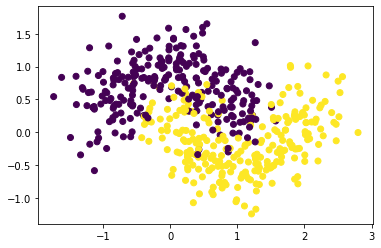

In [ ]:
NOISE_LEVEL = 0.3 # play around with this a bit

X, y = make_moons(n_samples=500, noise=NOISE_LEVEL, random_state=42)
plot_moons(X, y)

In [ ]:
# split data into training and test set - but what were the parameters again?
train_test_split?

In [ ]:
# split and scale X. Note: the scaler is fitted on the training data only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

Jetzt beginnen wir mit dem `TensorFlow`-Modell! Nachdem wir `TensorFlow` importiert haben besteht dies aus drei Schritten:
1. Wir spezifizieren das Modell. In dieser Session arbeiten wir nur mit sequentiellen Modellen, in denen wir die Layer Schritt für Schritt als Liste spezifizieren.
2. Dann müssen wir das Modell kompilieren. Dazu müssen wir über `loss` die Loss-Funktion und über `optimizer` den Optimierer angeben. Wir arbeiten mit `keras.optimizers.Adam` - das ist immer eine gute erste Wahl. Die Parameter von diesem Optimierer könnt ihr euch über `keras.optimizers.Adam?` anschauen. Zusätzlich kann man weitere Metriken angeben die während des Trainings angezeigt werden.
3. Und dann beginnt das Training mit den Trainingsdaten über die `fit`-Methode.

In [ ]:
# And now we use a TensorFlow model
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [ ]:
# specify model
model = keras.Sequential([ # im keras.Sequential-Modell wird das Netzwerk Layer für Layer definiert, die Layer sind in einer Liste
    layers.Input(shape=[2]), # dieser Layer definiert die Form des Inputs. Da wir zwei Inputvariablen haben, ist die Shape [2]. Bei Bildern mit 28x28 Pixeln und schwarz-weiß wäre sie [28, 28]. Wenn das Bild Farbe hätte wäre es [28, 28, 3], da Farben über drei Zahlen (rot, grün, blau) definiert werden.
    # voll spezifiziert heißt der Layer eigentlich tensorflow.keras.layers.Input() - da wir from tensorflow.keras import layers genutzt haben, reicht layers.Input()
    # der Input-Layer ist nicht unbedingt notwendig, die Input-Shape kann auch (a) über den ersten anderen Layer mit der Argument input_shape spezifiziert werden oder (b) automatisch inferiert werden - ich würde ihn aber nutzen um explizit zu machen, wie der Input aussieht
    layers.Dense(units=10, activation='relu'), # das hier ist ein fully-connected ("dense") layer, zusätzlich wird direkt die Aktivierungsfunktion (s. Folien) definiert
    layers.Dense(units=5,  activation='relu'),
    layers.Dense(units=1,  activation='sigmoid')
    # wie der letzte Layer aussieht hängt immer auch von dem Problem ab. In diesem Fall haben wir zwei Klassen, und wollen die Wahrscheinlichkeit modellieren, dass ein 
    # Datenpunkt in der ersten oder zweiten Klasse ist. 
    # Wenn wir z.B. 10 Klassen haben, würden wir 10 Output-Neuronen (units) haben und als activation='softmax' wählen - so würden wir eine Wahrscheinlichkeitverteilung
    # über die 10 Klassen bekommen (das macht softmax).
    # Bei 2 Klassen können wir 2 Output-Neuronen wählen - alternativ können wir aber auch nur eine Wahrscheinlichkeit explizit formulieren und die andere ist implizit
    # gegeben: Sie ist 1 minus die erste Wahrscheinlichkeit. In dem Fall wählen wir activation='sigmoid' - das führt dazu, dass die explizit modellierte Wahrscheinlichkeit
    # zweischen 0 und 1 liegt.
])

In [ ]:
# compile model
model.compile(loss='binary_crossentropy', # bei einem binary classification Problem ist 'binary_crossentropy' die normale Loss-Funktion.
              optimizer=keras.optimizers.Adam(), 
              metrics=['accuracy'])

In [ ]:
# let's briefly plot the unlearned decision surface - forgot how to use the function? Just use "?"" !
plot_moons_predictions?

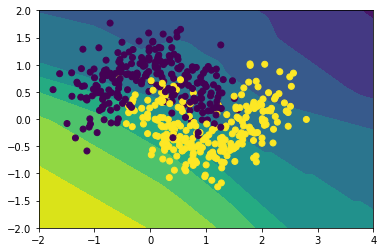

In [ ]:
# the model seems very bad - no wonder, it hasn't learned anything yet
plot_moons_predictions(X, y, model, scaler=scaler)

Nachdem das Modell spezifiziert und kompiliert wurde, können wir nun die Trainigsdaten nutzen um das Modell zu fitten. Zu Beginn geben wir der `fit`-Methode nur die Trainingsdaten und spezifizieren, wie viele Epochen trainiert wird, d.h., wie oft die Trainingsdaten dem Modell gezeigt werden. In jeder Epoche wird der gesamte Trainingsdatensatz genutzt um das Modell zu trainieren.

Wird die `fit`-Methode auf einem Modell erneut aufgerufen wird das Modell weitertrainiert, die weights und biases werden nicht neu initialisiert. Dies geschieht nur, wenn das Modell neu spezifiziert wird (und dann muss es auch erneut kompiliert werden).

In [ ]:
# train model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 0.6591 - accuracy: 0.6700
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.6775
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 0.6097 - accuracy: 0.7100
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5849 - accuracy: 0.7400
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5621 - accuracy: 0.7575
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7650
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 0.5169 - accuracy: 0.7750
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.7825
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7825
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4541 - accuracy: 0.8000
Epoch 11/

Nun werden wir das Modell erstmal nutzen um auf neuen Datenpunkten Vorhersagen auszuführen. Achtung: Auch einzelne Datenpunkte müssen im Batch-Format übergeben werden, d.h., im Array muss eine Liste sein, und in dieser Liste ist `[2, 0]` der einzige Eintrag.

In [ ]:
test_sample = np.array([[-1, 2]])
model(test_sample)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.00240338]], dtype=float32)>

In [ ]:
test_samples = np.array([[2, 0], [1, 0]])
model(test_samples)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.9800347 ],
       [0.67269874]], dtype=float32)>

Nun visualisiern wir erneut das prediction surface. Wenn ihr in den Code schauen wollt, ruft einfach `plot_moons_predicions??` auf.

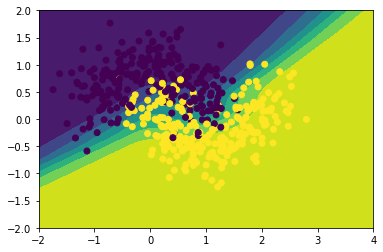

In [ ]:
plot_moons_predictions(X=X, y=y, model=model, scaler=scaler)